<a href="https://colab.research.google.com/github/LeanTavares/DataScience/blob/main/AG_Marketing_REG_LINEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio: Construindo um modelo de Regressão para marketing

Contexto - Introdução
Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos.

# Importando Bibliotecas

In [1]:
#Imports
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 1. Análise Descritiva

Esta etapa irei explorar os dados do dataset para compreender melhor as variáveis e identificar problemas. Vou utilizar a biblioteca Pandas para importar e manipular os dados e realizar cálculos estatísticos, além das bibliotecas de visualização.


 - Importando o dataset diretamente do google drive usando a função drive.mount para montar a pasta do drive no colab e depois importando o CSV com a função do pandas .read, direto para a variável mkt

In [2]:
#Acessando CSV
drive.mount('/content/drive')
#importando para mkt
mkt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MKT.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 - Informação sobre os dados para ver posiveis tratamentos a fazer, como nulos, tipo de dados entre outros


In [3]:
#visualização dos dados
mkt

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


 - Informações sobre os dados com a função do pandas .info para ver posiveis tratamentos a fazer nos tipos de dados e nulos

In [4]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


 - Usando a função do pandas .describe para verificar valores como, média, contagem, máximo e quartis

In [5]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


# 2. Análise Exploratória

Após a análise descritiva, não foram encontrados dados duplicados e nem tipos de dados fora do esperado, então não será feito tratamentos para isso.

Nesta etapa vou explorar mais a fundo os dados, identificando relações entre as variáveis e descobrindo padrões relevantes.
Para isso, serão utilizadas técnicas de visualização de dados e análises estatísticas, buscando possíveis correlações e identificando possíveis outliers ou desvios da normalidade.

 - Busca de outliers por meio de gráficos boxplot da biblioteca seaborn

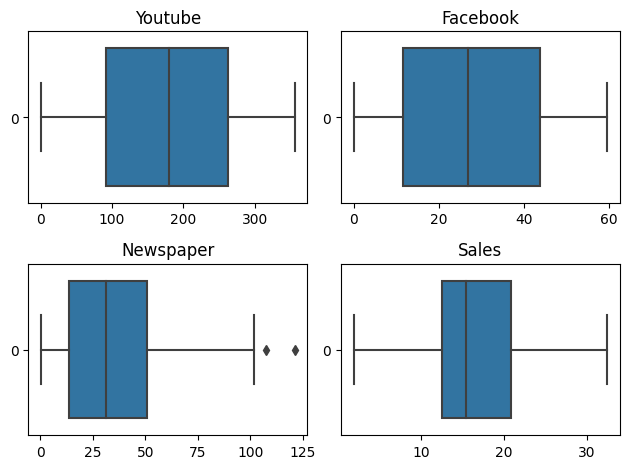

In [6]:
#Plotando gráficos boxplot, para os meios de mídias e sales em busca de dados outliers
plt.subplot(2,2,1)
sns.boxplot(data=mkt["youtube"], orient="h").set(title="Youtube")
plt.subplot(2,2,2)
sns.boxplot(data=mkt["facebook"], orient="h").set(title="Facebook")
plt.subplot(2,2,3)
sns.boxplot(data=mkt["newspaper"],orient="h").set(title="Newspaper")
plt.subplot(2,2,4)
sns.boxplot(data=mkt["sales"],orient="h").set(title="Sales")
plt.tight_layout()

 - foi verificado outliers em Newspaper vou usar o .loc para buscar os valores maiores que 100

In [7]:
#buscando valores maiores que 100 em newspaper com a função loc
mkt.loc[mkt['newspaper'] > 100,'newspaper']

46     107.28
72     121.08
136    101.76
Name: newspaper, dtype: float64

  - Decidi por utilizar o gráfico de Heat Map para analisar a correlação entre as variáveis
  - Pude observar uma grande relação entre
     - Youtube x Sales (78%)
     - Facebook X Sales (60%)
  - Já Newspaper X Sales não é tão forte apenas com 25% de correlação

<Axes: >

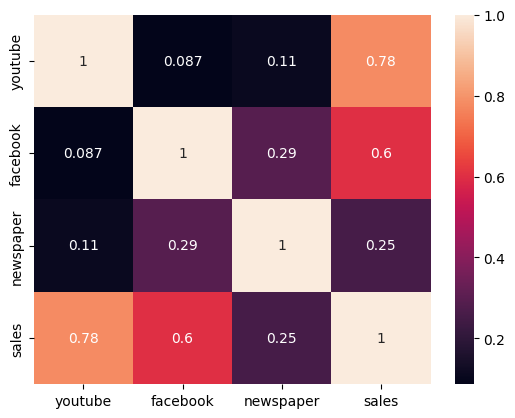

In [8]:
#Plotando Heatmap
sns.heatmap(mkt.corr(),annot=True)

 - Plotando histogramas com a contagem das Mídias separadamente usando a função histplot do seaborn, buscando algum insight importante

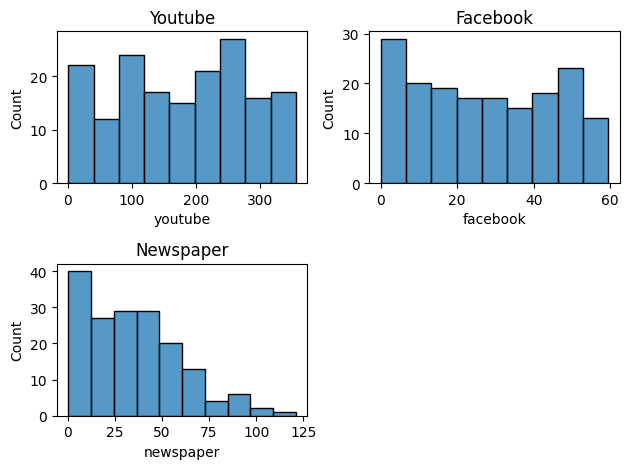

In [9]:
#plotando gráficos com histplot
plt.subplot(2,2,1)
sns.histplot(data=mkt["youtube"]).set(title="Youtube")
plt.subplot(2,2,2)
sns.histplot(data=mkt["facebook"]).set(title="Facebook")
plt.subplot(2,2,3)
sns.histplot(data=mkt["newspaper"]).set(title="Newspaper")
plt.tight_layout()

 - Plotando gráficos de dispersão usando o regplot do seaborn em busca de insights e melhor visualização dos dados




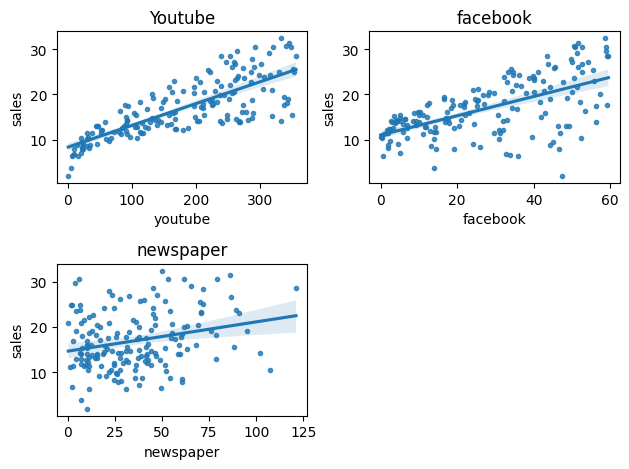

In [10]:
#gráficos de dispersão usando o regplot do seaborn
plt.subplot(2,2,1)
sns.regplot(data=mkt["youtube"], x=mkt["youtube"], y=mkt["sales"],marker=".", fit_reg=True).set(title="Youtube")
plt.subplot(2,2,2)
sns.regplot(data=mkt["facebook"],x=mkt["facebook"], y=mkt["sales"],marker=".",fit_reg=True).set(title="facebook")
plt.subplot(2,2,3)
sns.regplot(data=mkt["newspaper"],x=mkt["newspaper"], y=mkt["sales"],marker=".",fit_reg=True).set(title="newspaper")
plt.tight_layout()


#MODELAGEM

 Irei construir um modelo simples de regressão que permita a previsão solicitada pela empresa, com base nos dados disponíveis.
 Para isto, vou usar a regressão linear, importei as bibliotecas necessárias do Scikit learn e vou criar as variáveis de treino e teste para o modelo

1. Regressão Linear do SKLEARN
<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression>



Primeiramente vou criar as Variáveis X e Y.
*   X receberá as colunas das mídias
*   Y será o TARGET



In [11]:
#Criando variáveis X e Y
x = mkt[['youtube', 'facebook', 'newspaper']]
y = mkt[["sales"]]

In [12]:
#visualizando dataframes criados nas variáveis
display(x,y)

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36
...,...,...,...
166,45.84,4.44,16.56
167,113.04,5.88,9.72
168,212.40,11.16,7.68
169,340.32,50.40,79.44


,sales
0,12.60
1,25.68
2,14.28
3,11.52
4,20.88
...,...
166,9.12
167,11.64
168,15.36
169,30.60


#TEST DESIGN

##Dataset split:

Separação de Train/Test dataset padrão com 20% de massa para teste via metodo SKLEARN

Criando variáveis de X de Treino e X de Teste e Y de Treino e Y de teste

In [13]:
#Criação de variáveis de Treino e Teste e setando os parametros de test_size=0.2 (20%) e random_state=42 (padrão)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
#Visualizando
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 3)
(35, 3)
(136, 1)
(35, 1)


TECNICA. REGRESSÃO LINEAR

In [14]:
#usando a função LinearRegression do SCIKIT LEARN para treinar as variáveis passando através do .fit()
regLinear = LinearRegression().fit(X_train,y_train)

In [15]:
# Calculando o Rˆ2 de treino que resultou em 90% de acuracidade
LR_square=regLinear.score(X_train, y_train)
LR_square

0.9074962891333168

In [16]:
#Criando a variável que receberá o  x treino com a função .predict
y_pred = regLinear.predict(X_train)

In [17]:
#Agora fazendo o .fit das variáveis de teste
regLinear=LinearRegression().fit(X_test, y_test)

In [18]:
# Calculando o Rˆ2 de teste que resultou em 89% de acertividade nas predições a serem feitas
LR_square=regLinear.score(X_test, y_test)
LR_square

0.8925835445734595

In [25]:
#riando a variável que receberá a predição x test com a função .predict
y_pred_test = regLinear.predict(X_test)

# Resultados

Tabela com os dados fornecidos pelo cliente na variável y_teste, e os resultados da previsão da Regressão Linear

<Axes: >

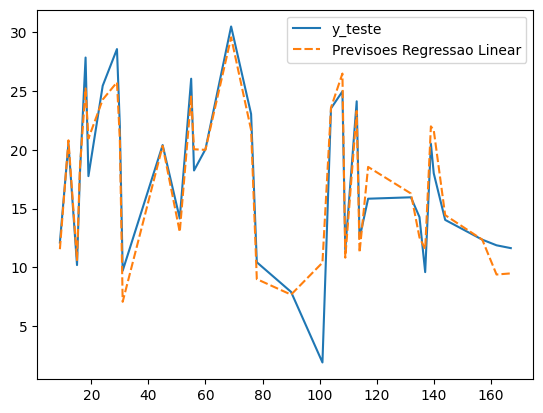

In [26]:
#Plotando o grafico de linhas com o seaborn para fazer comparacao com o dados fornecidos com o regressao linear
prev = pd.DataFrame()
prev["y_teste"] = y_test
prev["Previsoes Regressao Linear"] = y_pred_test
sns.lineplot(data=prev)

Tabela com os dados fornecidos pelo cliente na variável y_teste, e os resultados da previsão da Regressão Linear

In [27]:
prev

,y_teste,Previsoes Regressao Linear
101,1.92,10.404581
55,26.04,24.528014
56,18.24,20.040934
139,20.52,21.990620
157,12.36,12.360362
78,10.44,9.007425
135,14.28,12.545734
104,23.52,23.587688
109,11.52,10.828551
108,24.96,26.479141
